In [1]:
import sys
sys.path.append('..')

In [2]:
# Global flag to set a specific platform, must be used at startup.
import jax
jax.config.update('jax_platform_name', 'cpu')

In [3]:
# import jax
import jax.numpy as jnp
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt

from itertools import compress

from gruyere.brushes import notched_square_brush, show_mask
from gruyere.design import Design, _initialize_design
from gruyere.conditional_generator import _step_generator
from gruyere.states import DesignState

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 70

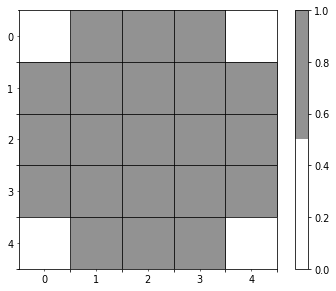

In [4]:
my_brush = notched_square_brush(5, 1)
show_mask(my_brush);

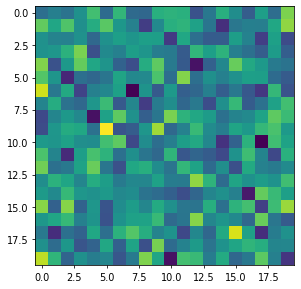

Step : 1


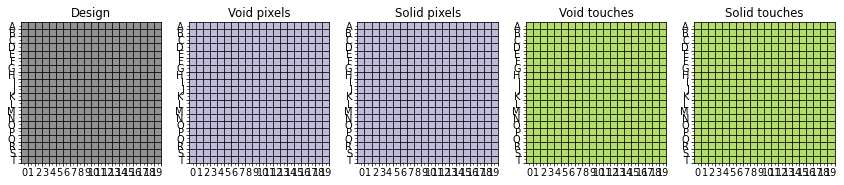

In [9]:
# reward = jnp.zeros((6,8))
reward = 2 * np.random.normal(size=(20, 20))
it = 1

# Enforce the order of pixels
eps = 0.1
# reward = reward.at[0,6].set(-1)
# reward = reward.at[0,0].set(1 - eps)
# reward = reward.at[4,6].set(-1 + 2 * eps)
# reward = reward.at[4,4].set(-1 + 3 * eps)
# reward = reward.at[5,0].set(-1 + 4 * eps)
# reward = reward.at[4,0].set(-1 + 5 * eps)
# reward = reward.at[2,5].set(-1 + 6 * eps)


plt.imshow(reward)
plt.show()

# des = _initialize_design(reward.shape)
des = _initialize_design(reward)

des.show()
print('Step :', it)

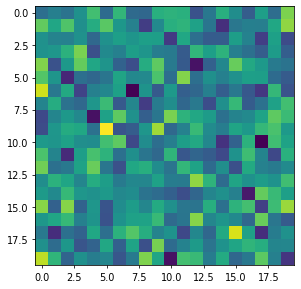

In [10]:
import jax.scipy as jsp

# total_reward = jsp.signal.convolve2d(reward, my_brush, mode='same')
total_reward = reward
plt.imshow(total_reward)
plt.show()

In [11]:
order = np.argsort(jnp.abs(total_reward).flatten())
id_sorted = list(
    zip(
        *map(lambda x: x.tolist(), jnp.unravel_index(order, reward.shape))
    )
)

# Beginning of the feasible design generation

des.show()
print('Step :', it)

print(id_sorted[-1])
des = _step_generator(des, my_brush, id_sorted[-1])
it += 1

new_id_sorted = list(compress(id_sorted, (des.x == DesignState.UNASSIGNED).flatten()[order]))

des.show()
print('Step :', it)

des = _step_generator(des, my_brush, (0,7))
it += 1

# id_sorted = list(compress(id_sorted, (des.x == DesignState.UNASSIGNED).flatten()[order]))

des.show()
print('Step :', it)

print(id_sorted[-1])
des = _step_generator(des, my_brush, new_id_sorted[-1])
it += 1

new_id_sorted = list(compress(id_sorted, (des.x == DesignState.UNASSIGNED).flatten()[order]))

des.show()
print('Step :', it)

print(id_sorted[-1])
des = _step_generator(des, my_brush, new_id_sorted[-1])
it += 1

new_id_sorted = list(compress(id_sorted, (des.x == DesignState.UNASSIGNED).flatten()[order]))

des.show()
print('Step :', it)

des = _step_generator(des, my_brush, new_id_sorted[-1])
it += 1

des.show()
print('Step :', it)

In [12]:
from gruyere.conditional_generator import generator

final_des = generator(reward, my_brush)

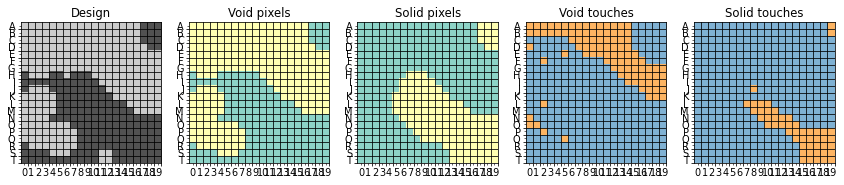

In [13]:
final_des.show()